In [ ]:
import pandas as pd
import random
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Fixed seed number

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
# eliminate outlier in Y_Quality
drop_idx = train_df.loc[train_df['Y_Quality'] > 0.57 ].index

train_df=train_df.drop(drop_idx, axis=0)

In [ ]:
train_df.shape

(597, 2881)

In [ ]:
# Replace values with Null to 0
train_df=train_df.fillna(0)
test_df=test_df.fillna(0)

In [ ]:
dataFeatures = []
zero=[]

for item in list(train_df):
    dataFeatures.append(item)
for item in dataFeatures:
    zero.append(len(train_df[train_df[item]==0]))

zerodata = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'zero':zero
})

In [ ]:
a=zerodata[zerodata['zero']== 597]['dataFeatures']

In [ ]:
a # column that has 0

8          X_3
11         X_6
19        X_14
75        X_70
79        X_74
         ...  
2849    X_2844
2877    X_2872
2878    X_2873
2879    X_2874
2880    X_2875
Name: dataFeatures, Length: 281, dtype: object

In [ ]:
train_df=train_df.drop(columns=a)
test_df=test_df.drop(columns=a)

In [ ]:
# Removed unnecessary variables that are not required for prediction.
train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
train_y = train_df['Y_Class']

test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

In [ ]:
from collections import Counter
collections.Counter(train_y)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

In [ ]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [ ]:
# Created derived variables by combining data based on high-importance features
# Determined through correlation analysis. 
# Identified and utilized the top 5 combinations that resulted in the best performance.
train_x["importance"] = train_x["X_248"] / train_x["X_248"].mean()+ train_x["X_374"] / train_x["X_374"].mean()+ train_x["X_373"] / train_x["X_373"].mean()+ train_x["X_130"] / train_x["X_130"].mean()+train_x["X_131"] / train_x["X_131"].mean()
test_x["importance"] = test_x["X_248"] / train_x["X_248"].mean()+test_x["X_374"] / train_x["X_374"].mean()+test_x["X_373"] / train_x["X_373"].mean()+test_x["X_130"] / train_x["X_130"].mean()+test_x["X_131"] / train_x["X_131"].mean()

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(597, 2597)
(597,)
(310, 2597)


In [ ]:
# Performed data partitioning 
train_X, test_X, train_Y, test_Y = train_test_split(train_x, train_y, test_size = 0.2, 
                                                    random_state = 0)

# Data Preprocessing
- Removed outliers from the data to enhance data quality and model performance.
- Eliminated data points where all values were either zero or null, taking into consideration the different implications of 0 and null values.
- Categorized categorical variables to convert them into discrete categories for better analysis and modeling.
- Created derived variables or features to capture additional information and improve model performance.




---



#  **Training**

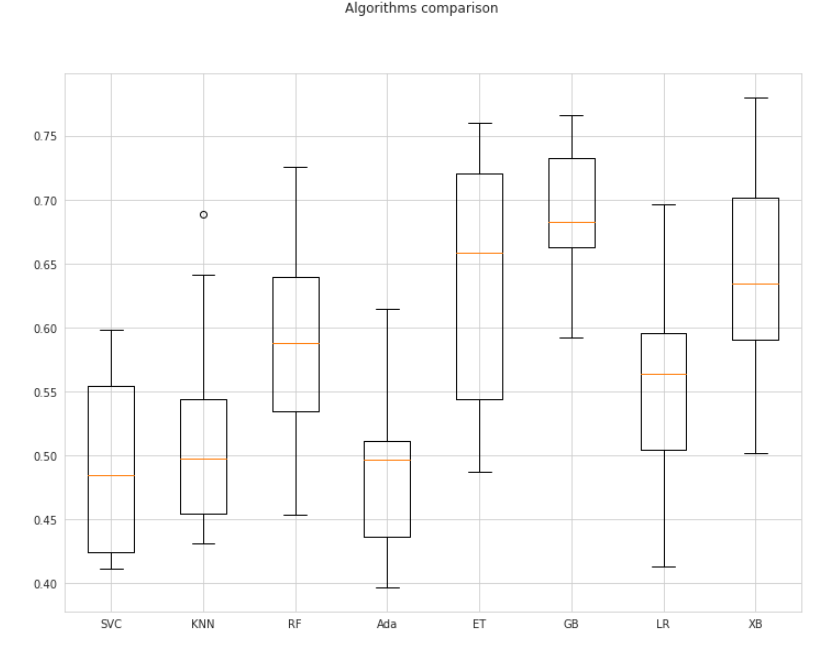  
GB가 가장 좋은 성능을 보이기 때문에 GB로 최종 선정

In [ ]:
# Gradient Boosing showed the best performance, so we chose GB
GB = GradientBoostingClassifier(random_state=37).fit(train_X, train_Y)
preds = GB.predict(test_X)
case_1 = f1_score(test_Y, preds, average='macro')
print(round(case_1, 4))

0.7649


In [ ]:
GB = GradientBoostingClassifier(random_state=37).fit(train_x, train_y)
preds= GB.predict(test_x) 

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
submit['Y_Class'] = preds
submit.to_csv('./submission2.csv', index=False)

In [ ]:
from collections import Counter
collections.Counter(preds)

## Result in Hackathon: 0.70011 => 70.01% accuracy